## Урок 1. Домашнее задание

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:<br>
**а)** зависимость цены на недвижимость в конкретном регионе от времени<br>
Да, это временной ряд. Цена на недвижимость в каждый конкретный момент времени, очевидно, зависит от значений множества факторов в предшествующие моменты времени, такие как, например, сезон, экономическая ситуация в стране, курс доллара, цены на стройматериалы и, вероятно, много других<br>
**b)** скорость полета самолета при перелете из аэропорта А в аэропорт В<br>
Это так же временной ряд. Значение скорости не может меняться скачкообразно и зависит от значений скорости в предыдущие моменты времени, а так же действий пилотов или внешних факторов, например, погодных условий, приводящих к изменению скорости.<br>
**c)** количество отказов компьютера<br>
Само по себе количество отказов не является временным рядом, так как отказ компьютера в прошлом никак не влияет на возможность отказа в будущем, но можно рассмотреть, например, ряд количества отказов в зависимости от износа оборудования<br>
**d)** число обращений в поликлинику по району<br>
Думаю, это можно отнести к временному ряду: наверняка, здесь присутствует сезонность, например, количество обращений больше в холодное время года, т.е. в самих данных уже есть зависимость от времени, хотя сами по себе обращения никак напрямую не связаны между собой<br>
**e)** координаты автобуса при движении по маршруту<br>
Тоже временной ряд. Думаю, этот случай аналогичен пункту b)<br>
**f)** координаты фигуры нарушителя в файле видеофиксации охранной системы<br>
Тоже думаю, что это можно рассматривать как временной ряд. Координата точно зависит от времени и не может меняться хаотично. По сути случай аналогичен предыдущему, только здесь отсутствует заранее известный маршрут, по которому двигается нарушитель. Вряд ли в этих данных будут какие-либо тренды или зависимости, но, мне кажется, проанализировав данные можно определить характер движения (бег, шаг, остановка), если нарушитель останавливался, то зачем, если бежал, то от чего.

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки

### Выводы

Анализ приведен ниже, основные выводы:<br>
1. В датасете присутствует 119068 записей, интервал - почасовой, данные имеются за период с 31 декабря 2005 по 2 января 2018, пропусков в данных нет
2. Визуальный анализ не показывает явных аномалий.
3. Виден невыраженный тренд на снижение энергопотребления, начиная с 2013 года. Вероятно, примерно в это время началась активная кампания по сохранению окружающей среды
4. Как и в выборке, рассмотренной на уроке, здесь присутствуют несколько повторяющихся и отсутствующих значений, связанных с переходом на летнее/зимнее время, а также нарушена индексация внутри дня

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [9]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [8]:
data['DUQ_MW'].isnull().sum()

0

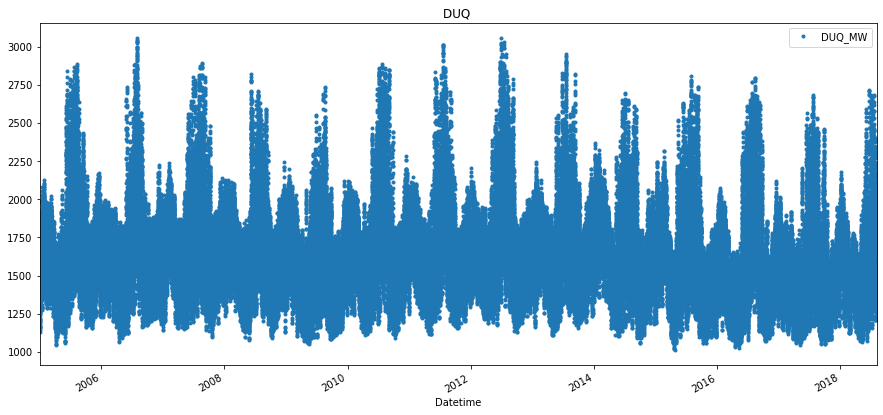

In [7]:
data.plot( style='.', figsize=( 15, 7 ), title='DUQ ' )

In [10]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [11]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [12]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

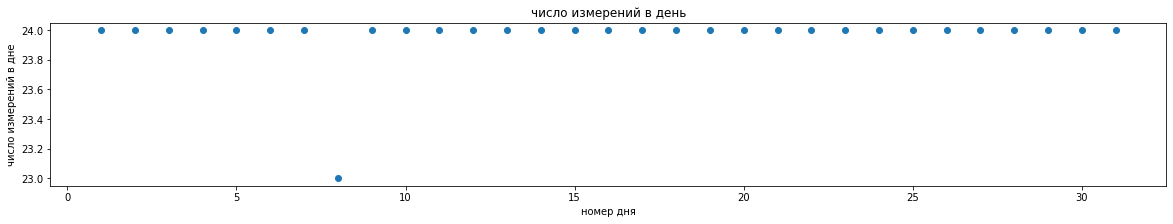

In [13]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

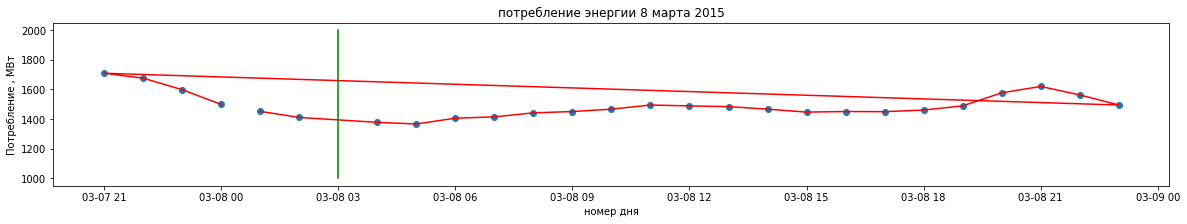

In [16]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-8 23:00:00'].index,data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')
line_ = pd.to_datetime(pd.Series(['2015-03-08 03:00:00', '2015-03-08 03:00:00']))
plt.plot(line_,np.array([1000, 2000]),'g')
plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 8 марта 2015')

plt.show()

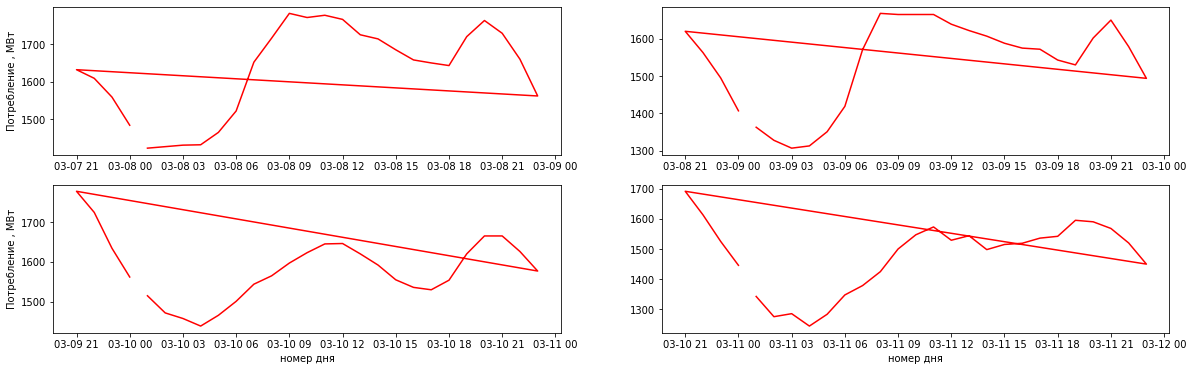

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

plt.subplot(2,2,2)
plt.plot(data['2015-03-08 21:00:00':'2015-03-9 23:00:00'].index,data['2015-03-08 21:00:00':'2015-03-09 23:00:00']['DUQ_MW'].values, 'r')

plt.subplot(2,2,3)
plt.plot(data['2012-03-09 21:00:00':'2012-03-10 23:00:00'].index,data['2012-03-09 21:00:00':'2012-03-10 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')
plt.xlabel('номер дня')

plt.subplot(2,2,4)
plt.plot(data['2006-03-10 21:00:00':'2006-03-11 23:00:00'].index,data['2006-03-10 21:00:00':'2006-03-11 23:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('номер дня')

plt.show()

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам

In [21]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [24]:
brent_weekly = brent_data.resample("W").mean()
brent_weekly.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [25]:
brent_monthly = brent_data.resample("M").mean()
brent_monthly.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent

Text(0.5, 0, 't')

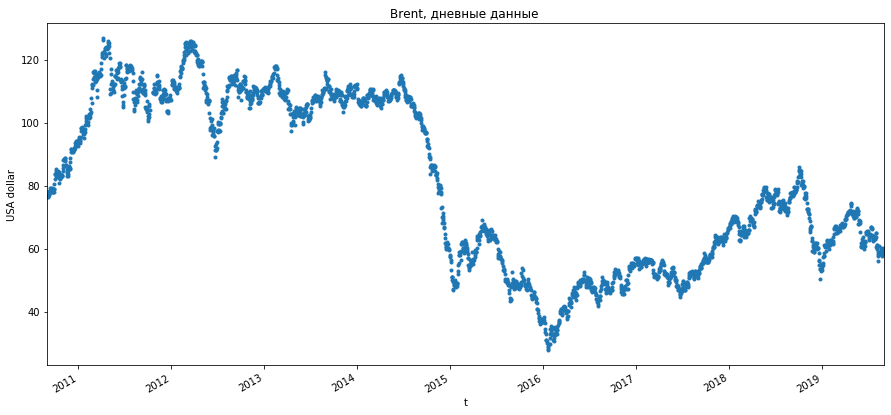

In [36]:
brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent, дневные данные ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

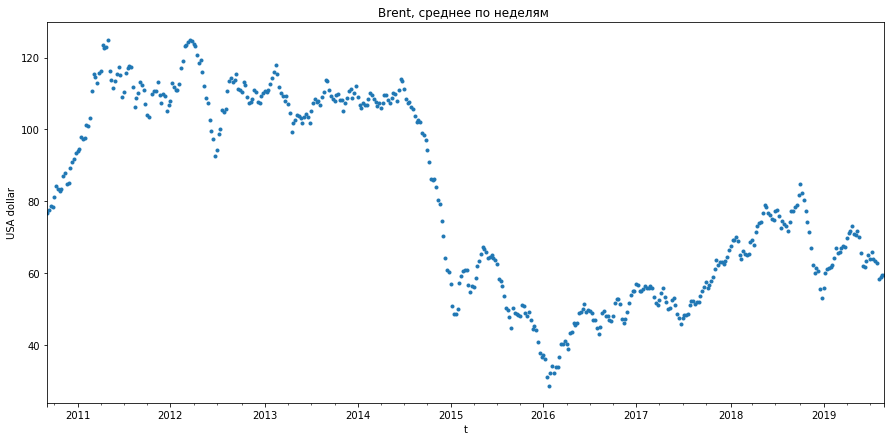

In [27]:
to_plot = brent_data.resample("W").mean()
to_plot['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent, среднее по неделям ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

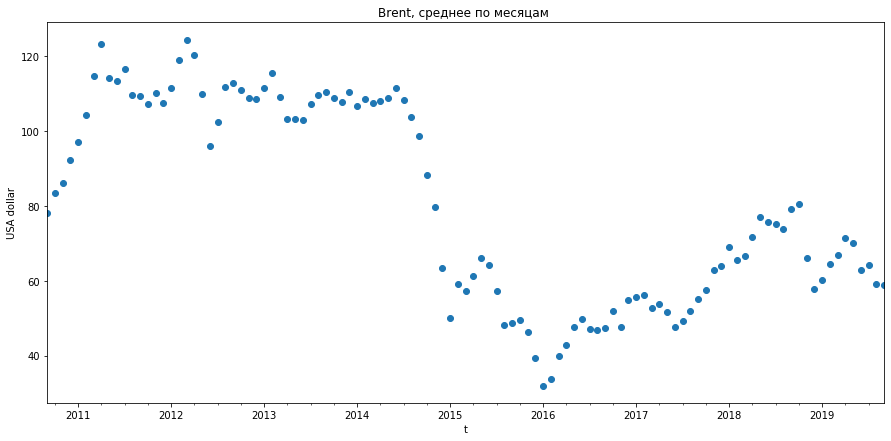

In [31]:
to_plot = brent_data.resample("M").mean()
to_plot['Значение'].plot( style='o', figsize=( 15, 7 ), title='Brent, среднее по месяцам ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

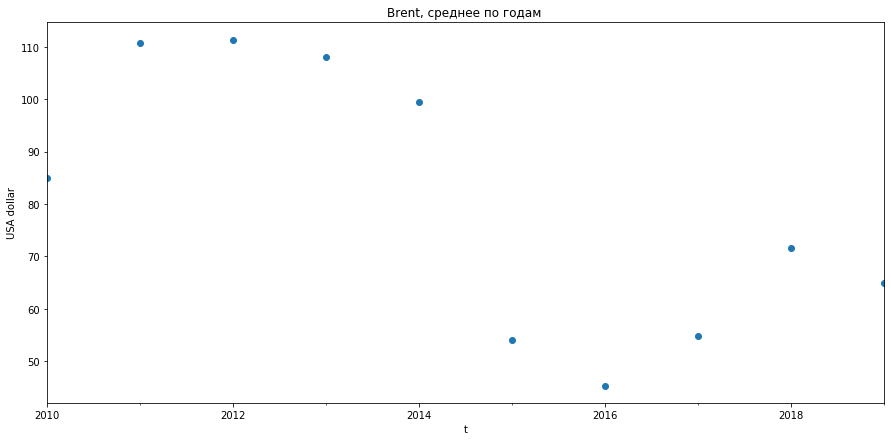

In [30]:
to_plot = brent_data.resample("Y").mean()
to_plot['Значение'].plot( style='o', figsize=( 15, 7 ), title='Brent, среднее по годам ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

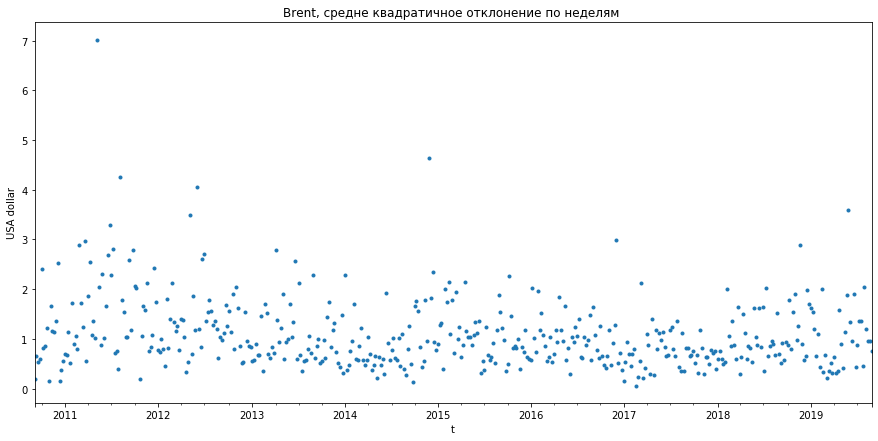

In [33]:
to_plot = brent_data.resample("W").std()
to_plot['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent, средне квадратичное отклонение по неделям ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

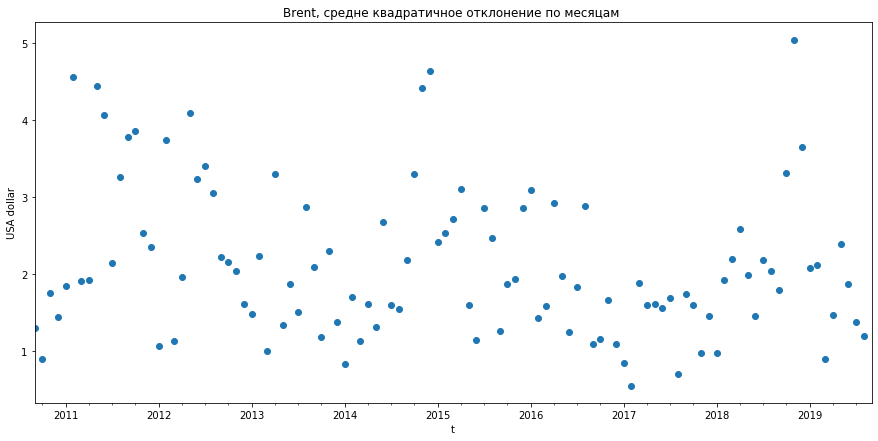

In [34]:
to_plot = brent_data.resample("M").std()
to_plot['Значение'].plot( style='o', figsize=( 15, 7 ), title='Brent, средне квадратичное отклонение по месяцам ')
plt.ylabel('USA dollar')
plt.xlabel('t')

Text(0.5, 0, 't')

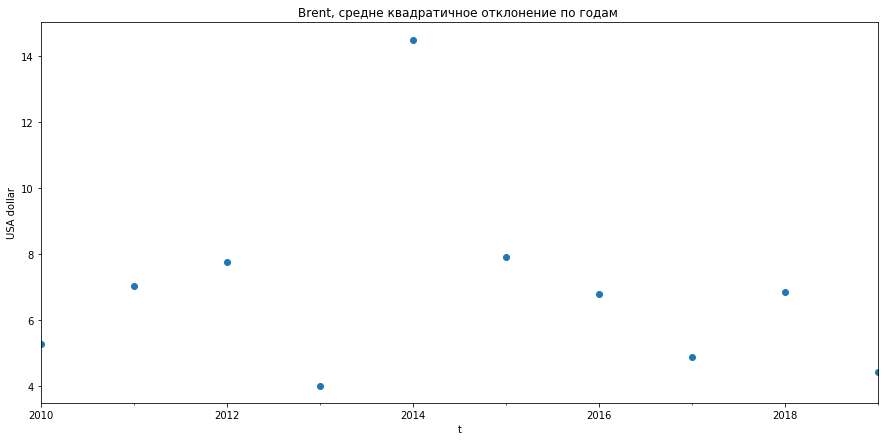

In [35]:
to_plot = brent_data.resample("Y").std()
to_plot['Значение'].plot( style='o', figsize=( 15, 7 ), title='Brent, средне квадратичное отклонение по годам ')
plt.ylabel('USA dollar')
plt.xlabel('t')

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Чем дальше мы отходим (недели-месяцы), тем яснее видно общую зависимость, сглаживаются локальные изменения и пики, видные на дневном и недельном графике, но характер графика, в целом, остается таким же, чего нельзя сказать про годовой график, который, на мой взгляд, является слишком грубым приближением из-за чересчур малого количества точек, использованного при его построении.